## Final Project Submission

Please fill out:
* Student name: AGNES CHOMBA
* Student pace: Part Time
* Scheduled project review date/time: 29/04/2025
* Instructor name: MARYANN MWIKALI
* Blog post URL:


#  Aircraft Risk Analysis for Investment Decisions

## Problem Statement

The organization is planning to diversify its portfolio by entering the aviation industry through the purchase of aircraft for commercial and private use. While this offers new growth opportunities, it also introduces substantial risks.Hence, a thorough risk assessment is required to ensure the investment is viable and sustainable.

## Project Goal
To indetify the aircraft with the lowest risk for company to venture in.

# Data Source and Data Exploration

The data comes from a kaggle from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

The columns used in this project include:





In [101]:
# Your code here - remember to use markdown cells for comments as well!
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df= pd.read_csv('Data/Aviation_Data.csv', index_col=0)
df.head()

c:\Users\Administrator\anaconda31\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50249 non-null  object 
 8   Airport.Name            52790 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87572 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

In [104]:
# List of relevant columns for the risk assessment
relevant_columns = [
    'Investigation.Type', 'Accident.Number', 'Event.Date', 'Injury.Severity', 'Aircraft.damage',
    'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Weather.Condition',
    'Broad.phase.of.flight', 'Purpose.of.flight', 'Total.Uninjured'
]

In [105]:
filtered_df = df[relevant_columns]
# Filter out rows with missing values in the relevant columns
filtered_df.head()

,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight,Purpose.of.flight,Total.Uninjured
Event.Id,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,2.0,0.0,UNK,Cruise,Personal,0.0
20001218X45447,Accident,LAX94LA336,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,UNK,Unknown,Personal,0.0
20061025X01555,Accident,NYC07LA005,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,3.0,NaN,IMC,Cruise,Personal,NaN
20001218X45448,Accident,LAX96LA321,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,2.0,0.0,IMC,Cruise,Personal,0.0
20041105X01764,Accident,CHI79FA064,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,1.0,2.0,VMC,Approach,Personal,0.0


In [106]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Injury.Severity         87889 non-null  object 
 4   Aircraft.damage         85695 non-null  object 
 5   Aircraft.Category       32287 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Number.of.Engines       82805 non-null  float64
 9   Engine.Type             81812 non-null  object 
 10  Total.Fatal.Injuries    77488 non-null  float64
 11  Total.Serious.Injuries  76379 non-null  float64
 12  Weather.Condition       84397 non-null  object 
 13  Broad.phase.of.flight   61724 non-null  object 
 14  Purpose.of.flight    

In [107]:
#Check missing value count
print(df[relevant_columns].isnull().sum())

Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Weather.Condition          5951
Broad.phase.of.flight     28624
Purpose.of.flight          7651
Total.Uninjured            7371
dtype: int64


The Aircraft category has a total of 58061 rows with missing values hence it's better to drop it

This is a for-loop that iterates over a list of column names. The columns listed inside the square brackets are the ones we want to fill the missing values (i.e., NaN values) for.

These columns represent categories (like Injury.Severity, Aircraft.damage, etc.), so it's often appropriate to replace missing values with the mode — the most frequent value in the column.

df[col]:
This accesses the DataFrame df and gets the specific column named col (which is dynamically set as the

In [108]:

def clean_aviation_data(df):
    # Drop rows with critical missing values
    df = df.dropna(subset=['Accident.Number', 'Event.Date', 'Make', 'Model'])

    # Fill categorical columns with mode (most frequent value)
    categorical_cols = ['Injury.Severity', 'Aircraft.damage', 'Engine.Type',
                        'Weather.Condition', 'Broad.phase.of.flight', 'Purpose.of.flight']
    for col in categorical_cols:
        if col in df.columns:  # Safe check if column exists
            df[col].fillna(df[col].mode()[0], inplace=True)

    # Fill numerical columns
    if 'Number.of.Engines' in df.columns:
        df['Number.of.Engines'].fillna(df['Number.of.Engines'].median(), inplace=True)
    for col in ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured']:
        if col in df.columns:
            df[col].fillna(0, inplace=True)

    # Drop Aircraft.Category if it exists and is too incomplete
    if 'Aircraft.Category' in df.columns:
        df.drop(columns=['Aircraft.Category'], inplace=True)

    return df


In [109]:
df = clean_aviation_data(filtered_df)
df.head()

c:\Users\Administrator\anaconda31\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\Users\Administrator\anaconda31\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight,Purpose.of.flight,Total.Uninjured
Event.Id,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,2.0,0.0,UNK,Cruise,Personal,0.0
20001218X45447,Accident,LAX94LA336,1962-07-19,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,UNK,Unknown,Personal,0.0
20061025X01555,Accident,NYC07LA005,1974-08-30,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,3.0,0.0,IMC,Cruise,Personal,0.0
20001218X45448,Accident,LAX96LA321,1977-06-19,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,2.0,0.0,IMC,Cruise,Personal,0.0
20041105X01764,Accident,CHI79FA064,1979-08-02,Fatal(1),Destroyed,Cessna,501,1.0,Reciprocating,1.0,2.0,VMC,Approach,Personal,0.0


In [110]:
# Show duplicate rows
duplicates =df[df.duplicated()]
print(duplicates)

               Investigation.Type Accident.Number  Event.Date Injury.Severity  \
Event.Id                                                                        
20220822105776           Accident      ERA22LA379  2022-08-20           Minor   
20220921105978           Incident      DCA22WA204  2022-09-14       Non-Fatal   

               Aircraft.damage    Make  Model  Number.of.Engines  \
Event.Id                                                           
20220822105776     Substantial  BOEING  A75N1                1.0   
20220921105978     Substantial  BOEING    787                1.0   

                  Engine.Type  Total.Fatal.Injuries  Total.Serious.Injuries  \
Event.Id                                                                      
20220822105776  Reciprocating                   0.0                     2.0   
20220921105978  Reciprocating                   0.0                     0.0   

               Weather.Condition Broad.phase.of.flight Purpose.of.flight  \
Event.Id 

In [111]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight,Purpose.of.flight,Total.Uninjured
Event.Id,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,2.0,0.0,UNK,Cruise,Personal,0.0
20001218X45447,Accident,LAX94LA336,1962-07-19,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,UNK,Unknown,Personal,0.0
20061025X01555,Accident,NYC07LA005,1974-08-30,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,3.0,0.0,IMC,Cruise,Personal,0.0
20001218X45448,Accident,LAX96LA321,1977-06-19,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,2.0,0.0,IMC,Cruise,Personal,0.0
20041105X01764,Accident,CHI79FA064,1979-08-02,Fatal(1),Destroyed,Cessna,501,1.0,Reciprocating,1.0,2.0,VMC,Approach,Personal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227106491,Accident,ERA23LA093,2022-12-26,Minor,Substantial,PIPER,PA-28-151,1.0,Reciprocating,0.0,1.0,VMC,Landing,Personal,0.0
20221227106494,Accident,ERA23LA095,2022-12-26,Non-Fatal,Substantial,BELLANCA,7ECA,1.0,Reciprocating,0.0,0.0,VMC,Landing,Personal,0.0
20221227106497,Accident,WPR23LA075,2022-12-26,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,Reciprocating,0.0,0.0,VMC,Landing,Personal,1.0


In [112]:
df.info()
# Check for duplicates again

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 20001218X45444 to 20221230106513
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88777 non-null  object 
 1   Accident.Number         88777 non-null  object 
 2   Event.Date              88777 non-null  object 
 3   Injury.Severity         88777 non-null  object 
 4   Aircraft.damage         88777 non-null  object 
 5   Make                    88777 non-null  object 
 6   Model                   88777 non-null  object 
 7   Number.of.Engines       88777 non-null  float64
 8   Engine.Type             88777 non-null  object 
 9   Total.Fatal.Injuries    88777 non-null  float64
 10  Total.Serious.Injuries  88777 non-null  float64
 11  Weather.Condition       88777 non-null  object 
 12  Broad.phase.of.flight   88777 non-null  object 
 13  Purpose.of.flight       88777 non-null  object 
 14  Total.Uninjured      

In [113]:
df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Uninjured
count,88777.000000,88777.000000,88777.000000,88777.000000
mean,1.136646,0.564493,0.240445,4.968145
std,0.432725,5.129247,1.434944,27.003094
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,699.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 20001218X45444 to 20221230106513
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88777 non-null  object 
 1   Accident.Number         88777 non-null  object 
 2   Event.Date              88777 non-null  object 
 3   Injury.Severity         88777 non-null  object 
 4   Aircraft.damage         88777 non-null  object 
 5   Make                    88777 non-null  object 
 6   Model                   88777 non-null  object 
 7   Number.of.Engines       88777 non-null  float64
 8   Engine.Type             88777 non-null  object 
 9   Total.Fatal.Injuries    88777 non-null  float64
 10  Total.Serious.Injuries  88777 non-null  float64
 11  Weather.Condition       88777 non-null  object 
 12  Broad.phase.of.flight   88777 non-null  object 
 13  Purpose.of.flight       88777 non-null  object 
 14  Total.Uninjured      

In [115]:
# Apply the same text case to all string columns
string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    df[col] = df[col].str.lower().str.strip()


<ipython-input-115-3b970105bf75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower().str.strip()


In [116]:
#df.to_csv('cleaned_aviation_data.csv', index=False)

# Data Analysis & Visualization

In [117]:
# group by aircraft make and Investigation.Type
df.groupby(['Make', 'Investigation.Type']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

,Make,Investigation.Type,counts
1301,cessna,accident,26789
5409,piper,accident,14683
658,beech,accident,5176
680,bell,accident,2662
855,boeing,incident,1379
854,boeing,accident,1359
4876,mooney,accident,1311
5905,robinson,accident,1218
2940,grumman,accident,1158
713,bellanca,accident,1040


Cessna aircraft have the highest number of recorded accidents, while aircraft manufactured by Bellanca have the lowest. This suggests that Bellanca aircraft may present the lowest risk of being involved in an accident. Only Boeing has the incident cases of 1379

In [118]:
df.groupby(['Make', 'Investigation.Type'])[['Total.Fatal.Injuries', 'Total.Uninjured']].sum() \
   .reset_index() \
   .assign(counts=lambda x: x['Total.Fatal.Injuries'] + x['Total.Uninjured']) \
   .sort_values(by='Total.Fatal.Injuries', ascending=False) \
   .head(10)


,Make,Investigation.Type,Total.Fatal.Injuries,Total.Uninjured,counts
1301,cessna,accident,9635.0,32582.0,42217.0
854,boeing,accident,8746.0,100276.0,109022.0
5409,piper,accident,6681.0,16869.0,23550.0
658,beech,accident,3779.0,6760.0,10539.0
680,bell,accident,1330.0,2841.0,4171.0
183,airbus,accident,1325.0,12150.0,13475.0
4603,mcdonnell douglas,accident,1286.0,19795.0,21081.0
191,airbus industrie,accident,1174.0,9535.0,10709.0
2027,douglas,accident,983.0,3164.0,4147.0
4876,mooney,accident,685.0,1219.0,1904.0


In [119]:
summary = (
    df.groupby(['Make', 'Investigation.Type'])
      .agg(
          counts=('Total.Uninjured', 'sum'),                         # Count of accidents
          Total_Fatal_Injuries=('Total.Fatal.Injuries', 'sum'),  # Sum of fatal injuries
          Total_Uninjured=('Total.Uninjured', 'sum')           # Sum of uninjured
      )
      .reset_index()
      .sort_values(by='counts', ascending=False)   # Sort by accident count
)

# Display the top 10
summary.head(10)

,Make,Investigation.Type,counts,Total_Fatal_Injuries,Total_Uninjured
855,boeing,incident,108092.0,2.0,108092.0
854,boeing,accident,100276.0,8746.0,100276.0
1301,cessna,accident,32582.0,9635.0,32582.0
4604,mcdonnell douglas,incident,25307.0,0.0,25307.0
4603,mcdonnell douglas,accident,19795.0,1286.0,19795.0
5409,piper,accident,16869.0,6681.0,16869.0
183,airbus,accident,12150.0,1325.0,12150.0
192,airbus industrie,incident,11726.0,0.0,11726.0
191,airbus industrie,accident,9535.0,1174.0,9535.0
184,airbus,incident,9111.0,0.0,9111.0


In [120]:
# relationship of Aircraft damage,Phase of flight, and make
df.groupby(['Make', 'Phase.of.Flight', 'Aircraft.damage']) \
  .size() \
  .reset_index(name='count') \
  .sort_values(by='count', ascending=False) \
  .head(10)




KeyError: 'Phase.of.Flight'

In [ ]:
#print(df.describe(include='object'))

<ipython-input-74-99793e4143d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
<ipython-input-74-99793e4143d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Event.Date'].dt.year


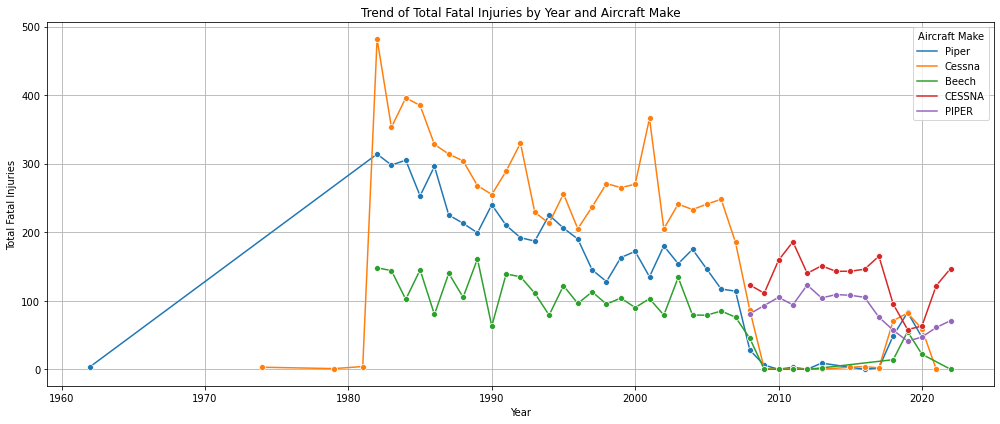

In [ ]:
# Convert Event.Date to datetime and extract year
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year

# Group by Year and Make, summing the total fatal injuries
injury_trend = df.groupby(['Year', 'Make'])['Total.Fatal.Injuries'].sum().reset_index()

# Filter for top 5 most frequent makes (optional for clearer plotting)
top_makes = df['Make'].value_counts().nlargest(5).index
injury_trend = injury_trend[injury_trend['Make'].isin(top_makes)]

# Plot the trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=injury_trend, x='Year', y='Total.Fatal.Injuries', hue='Make', marker='o')
plt.title('Trend of Total Fatal Injuries by Year and Aircraft Make')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.legend(title='Aircraft Make')
plt.grid(True)
plt.tight_layout()
plt.show()

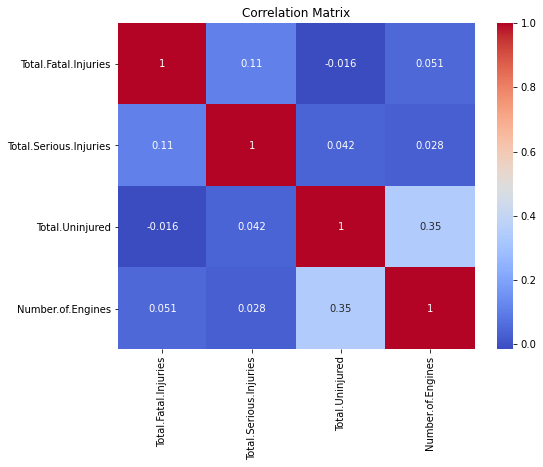

In [ ]:
# Compute correlation matrix
corr_matrix = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured', 'Number.of.Engines']].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Injury Severity Distribution

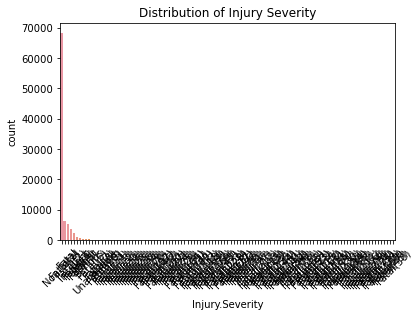

In [ ]:
sns.countplot(data=df, x='Injury.Severity', order=df['Injury.Severity'].value_counts().index)
plt.title("Distribution of Injury Severity")
plt.xticks(rotation=45)
plt.show()

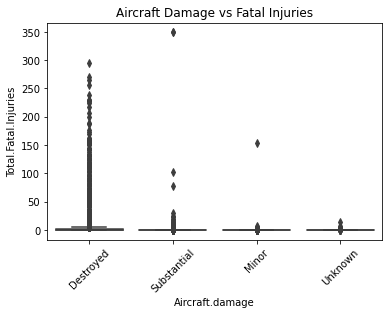

In [ ]:
#Aircraft Damage vs Fatal Injuries
sns.boxplot(data=df, x='Aircraft.damage', y='Total.Fatal.Injuries')
plt.title("Aircraft Damage vs Fatal Injuries")
plt.xticks(rotation=45)
plt.show()

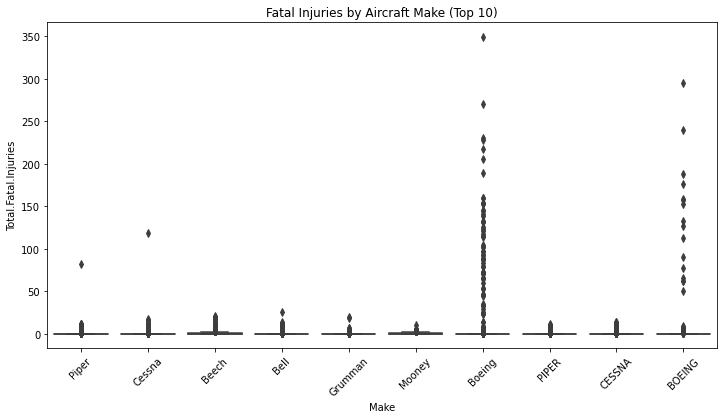

In [ ]:
#Fatal Injuries by Make (Top 10)
top_makes = df['Make'].value_counts().nlargest(10).index
filtered = df[df['Make'].isin(top_makes)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x='Make', y='Total.Fatal.Injuries')
plt.title("Fatal Injuries by Aircraft Make (Top 10)")
plt.xticks(rotation=45)
plt.show()

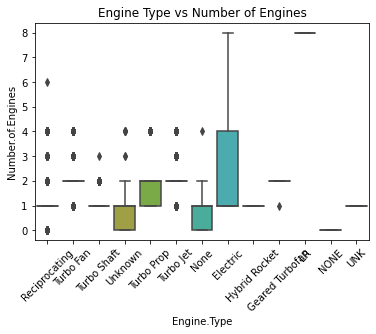

In [ ]:
  #Engine Type vs Number of Engines
sns.boxplot(data=df, x='Engine.Type', y='Number.of.Engines')
plt.title("Engine Type vs Number of Engines")
plt.xticks(rotation=45)
plt.show()

In [ ]:
pivot = df.pivot_table(
    values='Total.Fatal.Injuries',
    index='Engine.Type',
    columns='Aircraft.damage',
    aggfunc='mean'
)
print(pivot)

Aircraft.damage  Destroyed     Minor  Substantial   Unknown
Engine.Type                                                
Electric          0.000000       NaN     0.250000       NaN
Geared Turbofan        NaN  0.000000     0.000000       NaN
Hybrid Rocket     1.000000       NaN          NaN       NaN
LR                     NaN       NaN     0.000000       NaN
NONE                   NaN       NaN     0.000000       NaN
None              0.000000  0.000000     0.058824       NaN
Reciprocating     1.771789  0.169930     0.135123  0.470588
Turbo Fan        22.775510  0.005979     0.057037       NaN
Turbo Jet         5.864286  0.024691     0.092269       NaN
Turbo Prop        2.685254  0.055556     0.167765       NaN
Turbo Shaft       1.444824  0.054945     0.159151       NaN
UNK                    NaN       NaN     0.000000       NaN
Unknown           6.621771  0.113636     0.117904       NaN
